<a href="https://colab.research.google.com/github/hiidenpelto/data_science/blob/master/Projeto_de_Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Cartões de crédito se tornaram uma peça fundamental para fazer a engrenagem do dia-a-dia dos cidadãos girar de forma apropriada e sem percalços, ao substituírem amplamente a utilização do papel-moeda para a realização de compras.

Juntamente com essa substituição decorre uma nova modalidade criminosa: a realização de fraudes nos cartões de crédito. Milhões de pessoas são vítimas desse golpe todo ano, onde bandidos conseguem realizar compras com cartões alheios de forma indevida, prejudicando tanto o cliente como a instituição financeira.

<p align=center>
<img src="https://www.dinheirovivo.pt/wp-content/uploads/2017/12/Cart%C3%A3o-de-cr%C3%A9dito-Internacional.jpg" width="70%"></p>

Seria absolutamente impossível para as operadoras dos cartões designarem indivíduos para analisarem cada uma das milhões de transações que são efetuadas em todo o país diariamente, com a finalidade de descobrir quais delas são fraudadas e impedir tal ocorrência.

A solução para esse problema é utilizar um algoritmo de Inteligência Artificial que, ao analisar todas as características da transação, determinará - com certa margem de erro - a idoneidade daquela compra. Assim, ele irá permitir a realização da transação ou irá bloqueá-la.

Isso é exatamente o que iremos realizar ao longo desse projeto, ao utilizarmos uma base de dados de transações realizadas com cartões de crédito para, utilizando a Inteligência Artificial, promovermos o maior índice de acerto possível nas previsões de transações fraudadas.

## Importando os Dados



O *dataset* que iremos trabalhar representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações de uma operadora europeia de cartões de crédito.

Vamos iniciar o projeto importando os pacotes de dados necessários, bem como o *dataset*.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Importado o *dataset* e transformado ele em DataFrame, veremos as suas primeiras 5 entradas.


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As colunas V1, V2, e seguintes estão caracterizadas dessa forma para anonimizar os dados, ou seja, foram tiradas todas as informações que pudessem identificar o autor da transação realizada. 

Ademais, quase todas as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes.

As únicas variáveis que não passaram por este processo nesse *dataset* foram as colunas `Time`, `Amount` e `Class`. Tanto que somente dessas colunas podemos extrair algum tipo de informação ao usarmos o `describe()`.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Verificaremos também a quantidade de entradas nulas nesse *dataset*. Como veremos abaixo, ele não possui nenhuma dessa forma.

In [ ]:
df.isnull().sum().max()

0

## Análise Gráfica

Faremos agora algumas análises gráficas do DataFrame, vendo quais *insigths* podemos extrair desse conjunto.

Inicialmente, destacaremos o enorme desbalanceamento existente na coluna `Class`, que é justamente a coluna onde é identificado se uma transação foi válida ou foi fraudada. `0` são as transações normais, enquanto `1` são as transações fraudadas.

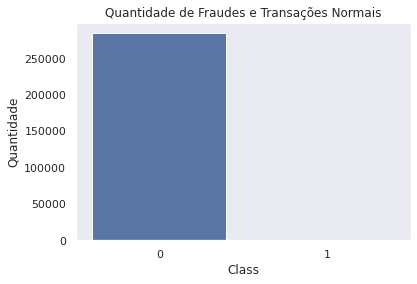

In [ ]:
sns.set()

fig, ax = plt.subplots()
sns.countplot(data=df, x="Class", ax=ax)
ax.set_title("Quantidade de Fraudes e Transações Normais")
ax.set_ylabel("Quantidade");

Outro não poderia ser o apontamento, tendo em vista que das centenas de milhares de transações apenas algumas poucas irão ser fraudulentas.


Através do histograma, poderemos comparar a quantidade de tempo realizada nas transações normais e nas transações fraudadas. Assim, poderemos observar se existe uma grande diferença entre essas duas classes de transações no tempo demandado para completá-las.


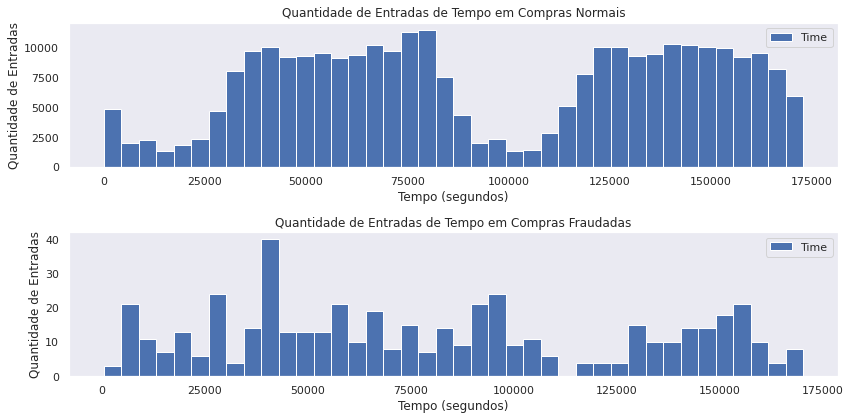

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
df.loc[df.Class == 0].plot("Class", "Time", kind="hist", bins=40, ax=ax1)
ax1.set_title("Quantidade de Entradas de Tempo em Compras Normais")
ax1.set_xlabel("Tempo (segundos)")
ax1.set_ylabel("Quantidade de Entradas")


df.loc[df.Class == 1].plot("Class", "Time", kind="hist", bins=40, ax=ax2)
ax2.set_title("Quantidade de Entradas de Tempo em Compras Fraudadas")
ax2.set_xlabel("Tempo (segundos)")
ax2.set_ylabel("Quantidade de Entradas")
plt.tight_layout()

Já no histograma abaixo, podemos analisar a relação entre a quantidade de compras normais e fraudadas em relação ao montante comprado nas transações.


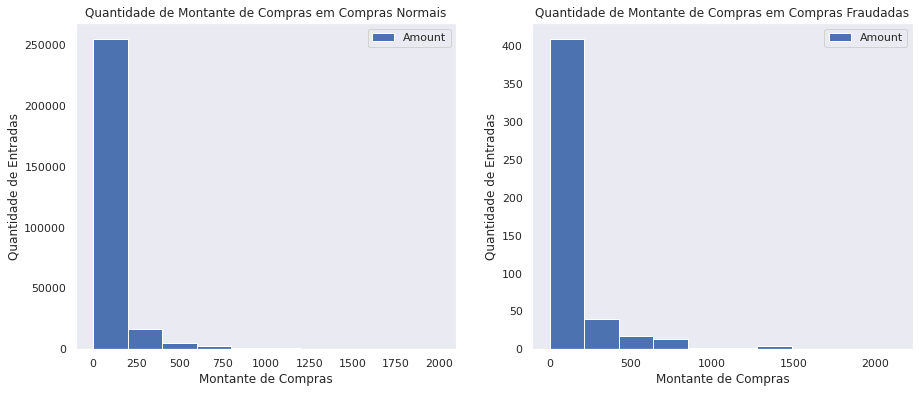

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
df.loc[(df.Class == 0) & (df.Amount < 2000)].plot("Class", "Amount", kind="hist", ax=ax1)
ax1.set_title("Quantidade de Montante de Compras em Compras Normais")
ax1.set_xlabel("Montante de Compras")
ax1.set_ylabel("Quantidade de Entradas")

df.loc[df.Class == 1].plot("Class", "Amount", kind="hist", ax=ax2)
ax2.set_title("Quantidade de Montante de Compras em Compras Fraudadas")
ax2.set_xlabel("Montante de Compras")
ax2.set_ylabel("Quantidade de Entradas");

Através do gráfico de caixa, observamos os *outliers* em relação ao montante de compras efetuado nas transações fraudadas.


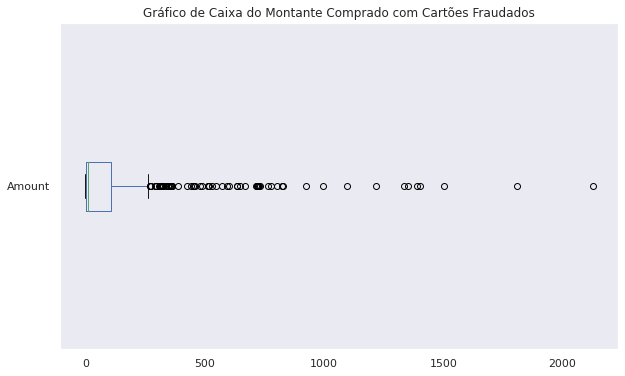

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df.loc[df.Class == 1].plot("Class", "Amount", kind="box", vert=False, ax=ax)
ax.set_title("Gráfico de Caixa do Montante Comprado com Cartões Fraudados");

## Modelo de Machine Learning

Realizada a análise gráfica do *dataset*, partiremos agora para a criação de um modelo de Machine Leraning para prevermos se uma transação financeira é fraudada ou não, buscando sempre a maior exatidão possível.

Antes de começar tal tarefa, é necessário transformarmos as colunas `Time` e `Amount`, deixando-as na mesma métrica das demais colunas.


In [ ]:
df_clean = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean["Amount_Scaler"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df_clean["Time_Scaler"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

df_clean = df.drop(labels={"Amount", "Time"}, axis=1)

In [ ]:
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Realizaremos agora a separação do DataFrame em dois: o `X` conterá tudo, exceto a coluna `Class`; enquanto o `y` somente terá essa variável.




In [ ]:
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]

O próximo passo é serparar o *dataset* em dados de treino e dados de teste, permitindo que o modelo treine as previsões nos dados de treino e valide-as nos dados de teste.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

Feita essa separação, importaremos o modelo de Regressão Logística para prever as fraudes nos cartões. Após isso, determinaremos que nosso modelo de Machine Learning treine as previsões nos dados de treino.

Após esse exaustivo treinamento, nosso modelo irá aplicar o que aprendeu nos dados de teste.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Através do `classification_report`, veremos como se saiu o nosso modelo, ou seja, quão preciso ele foi em classificar as transações como fraudes, utilizando diversas métricas diferentes.


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.73      0.79       123

    accuracy                           1.00     71202
   macro avg       0.92      0.87      0.89     71202
weighted avg       1.00      1.00      1.00     71202



Neste caso em particular, uma forma interessante de avaliar a precisão do modelo é através da métrica `recall`. Isso pelo fato dela considerar, além dos positivos verdadeiros, os falsos negativos, ou seja, aquelas transações que eram fraudadas e o modelo definiu como normais.

Como vemos acima, o nosso modelo identificou apenas 73% das transações fraudadas, deixando passar uma quantidade significativa de fraudes.

Buscando melhorar a performance desse modelo de identificação de fraudes, utilizaremos outro modelo, a chamada `Decision Tree`. Efetuaremos os mesmos passos realizados quando utilizamos o modelo de Regressão Logística.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=8, criterion="entropy")

model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.81      0.85       123

    accuracy                           1.00     71202
   macro avg       0.94      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



Notamos uma considerável melhora na perfomance quando analisamos a métrica `recall`. O modelo de `Decision Tree` conseguiu identificar 81% das transações fraudadas, um aumento experessivo de 8% em relação à Regressão Logística.